# Titanic

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.


## Objectives of the project
In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

(1) Description of the variables
(2) Features engineering
(3) Models building, evaluations and prediction

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

## Import data

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

## data description

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
y=train['Survived'].value_counts()
print(y)

0    549
1    342
Name: Survived, dtype: int64


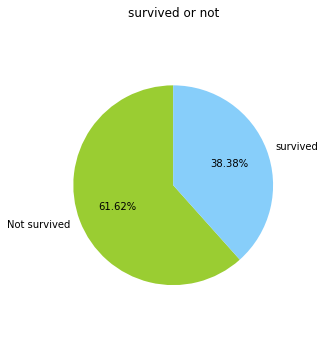

In [26]:
plt.figure(figsize=(4,6))
labels = [u'Not survived',u'survived'] 
sizes = [549,342] #每块值
colors = ['yellowgreen','lightskyblue'] #每块颜色定义
explode = (0,0) #将某一块分割出来，值越大分割出的间隙越大
patches,text1,text2 = plt.pie(sizes,
                      explode=explode,
                      labels=labels,
                      colors=colors,
                      autopct = '%3.2f%%', #数值保留固定小数位
                      shadow = False, #无阴影设置
                      startangle =90, #逆时针起始角度设置
                      pctdistance = 0.6) #数值距圆心半径倍数距离
plt.axis('equal')
plt.title('survived or not')
plt.show()

In [15]:
y2=train['Pclass'].value_counts()
print(y2.index.tolist())
print(y2.tolist())

[3, 1, 2]
[491, 216, 184]


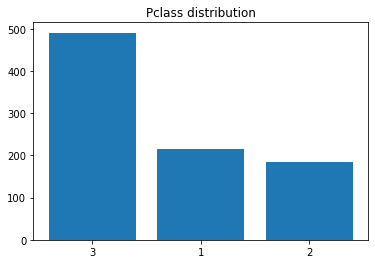

In [16]:
INDEX = ('3', '1', '2')
VALUE = [491, 216, 184]
plt.bar(INDEX, VALUE)
plt.title('Pclass distribution')
plt.show()

In [18]:
y3=train['Sex'].value_counts()
print(y3.index.tolist())
print(y3.tolist())

['male', 'female']
[577, 314]


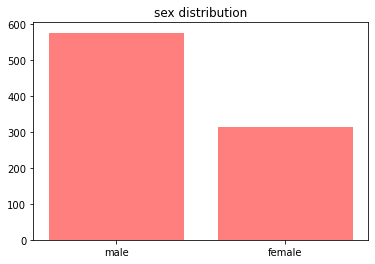

In [20]:
INDEX = ('male', 'female')
VALUE = [577, 314]
plt.bar(INDEX, VALUE,color='red',alpha=0.5)
plt.title('sex distribution')
plt.show()

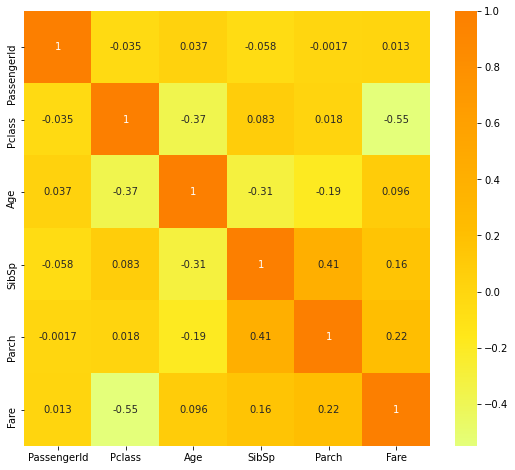

In [25]:
import seaborn as sns
data2=train.drop('Survived',axis=1)
corr = data2.corr()
f= plt.figure(figsize=(20,8))
ax1=f.add_subplot(121)
sns.heatmap(corr, cmap = 'Wistia', annot= True);

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Null value processing
Cabin and Age had many null value,espeically for cabin.
(1)Merge the data of train and test,Survived is the dependent variable
(2)Transform the Cabin colum into Yes and no
(3)Process the null value for Age column
(3)Fill the null value for fare and embarked

In [8]:
train['data_set']='train'
test['data_set']='test'
all_data1 = pd.concat([train, test])

In [9]:
y=train['Survived']

In [10]:
all_data1.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
data_set          0
dtype: int64

In [11]:
all_data1['Cabin']=all_data1['Cabin'].apply(lambda x:0 if type(x) == float else 1)

In [12]:
print(all_data1['Cabin'].value_counts())

0    1014
1     295
Name: Cabin, dtype: int64


fill the null value for age column with random number

In [13]:
print(all_data1['Age'].isnull().sum())

263


In [14]:
age_mean=all_data1['Age'].mean()
age_std=all_data1['Age'].std()
age_random_list=np.random.randint(age_mean-age_std,age_mean+age_std,size=263)

In [15]:
all_data1['Age'][all_data1['Age'].isnull()]=age_random_list

In [16]:
print(all_data1['Age'].isnull().sum())

0


fill the null value for embarked with mode
fill the null value for fare with mean

In [17]:
all_data1['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
all_data1['Embarked'][all_data1['Embarked'].isnull()]='S'

In [19]:
all_data1['Fare'].describe()

count    1308.000000
mean       33.295479
std        51.758668
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [20]:
all_data1['Fare'][all_data1['Fare'].isnull()]=33.295479

# Feature Engineering

For more features:
(1)

In [21]:
def getTitle(name):
    title_search=re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return ""
all_data1["Title"] = all_data1["Name"].apply(getTitle)

In [22]:
all_data1["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Ms            2
Mlle          2
Major         2
Jonkheer      1
Capt          1
Don           1
Lady          1
Mme           1
Dona          1
Sir           1
Countess      1
Name: Title, dtype: int64

In [23]:
Miss=['Miss','Ms','Mlle']
Mr=['Mr','MMe',"Mme"]
Rare=['Rev','Dr','Col','Major','Don','Countess','Sir','Lady','Jonkheer',
     'Dona','Capt']
all_data1['Title'].replace(Miss,"Miss",inplace=True)
all_data1['Title'].replace(Mr,"Mr",inplace=True)
all_data1['Title'].replace(Rare,"Rare",inplace=True)
all_data1['Title'].value_counts()

Mr        758
Miss      264
Mrs       197
Master     61
Rare       29
Name: Title, dtype: int64

New feature:family size

In [24]:
all_data1['FamilySize']=all_data1['SibSp']+all_data1['Parch']+1
all_data1['FamilySize'].value_counts()

1     790
2     235
3     159
4      43
6      25
5      22
7      16
11     11
8       8
Name: FamilySize, dtype: int64

In [25]:
all_data1['FamilySize'].isnull().sum()

0

In [26]:
all_data1['Sex']=all_data1['Sex'].map({"female":0,"male":1}).astype(int)

In [27]:
all_data1['agegroup']=pd.cut(all_data1['Age'],5)

In [28]:
print(all_data1['agegroup'].value_counts())

(16.136, 32.102]    677
(32.102, 48.068]    363
(0.0902, 16.136]    150
(48.068, 64.034]    106
(64.034, 80.0]       13
Name: agegroup, dtype: int64


In [29]:
all_data1['agegroup'].isnull().sum()

0

In [30]:
all_data1.loc[all_data1['Age']<=16.136,'AgeG']=0
all_data1.loc[(all_data1['Age']>16.136)&(all_data1['Age']<=32.102),'AgeG']=1
all_data1.loc[(all_data1['Age']>32.102)&(all_data1['Age']<=48.068),'AgeG']=2
all_data1.loc[(all_data1['Age']>48.068)&(all_data1['Age']<=64.034),'AgeG']=3
all_data1.loc[(all_data1['Age']>64.034)&(all_data1['Age']<=80.0),'AgeG']=4

In [31]:
all_data1['AgeG'].isnull().sum()

0

In [32]:
all_data1['Faregroup']=pd.qcut(all_data1['Fare'],4)
print(all_data1['Faregroup'].value_counts())

(-0.001, 7.896]      337
(14.454, 31.275]     328
(31.275, 512.329]    324
(7.896, 14.454]      320
Name: Faregroup, dtype: int64


In [33]:
all_data1['Faregroup'].isnull().sum()

0

In [34]:
all_data1.loc[all_data1['Fare']<=7.896,'FareG']=0
all_data1.loc[(all_data1['Fare']>7.896)&(all_data1['Fare']<=14.454),'FareG']=1
all_data1.loc[(all_data1['Fare']>14.454)&(all_data1['Fare']<=31.275),'FareG']=2
all_data1.loc[(all_data1['Fare']>31.275)&(all_data1['Fare']<=512.3292),'FareG']=3

In [35]:
all_data1['FareG'].isnull().sum()

0

## Spilt the data

In [36]:
all_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  1309 non-null   int64   
 1   Survived     891 non-null    float64 
 2   Pclass       1309 non-null   int64   
 3   Name         1309 non-null   object  
 4   Sex          1309 non-null   int64   
 5   Age          1309 non-null   float64 
 6   SibSp        1309 non-null   int64   
 7   Parch        1309 non-null   int64   
 8   Ticket       1309 non-null   object  
 9   Fare         1309 non-null   float64 
 10  Cabin        1309 non-null   int64   
 11  Embarked     1309 non-null   object  
 12  data_set     1309 non-null   object  
 13  Title        1309 non-null   object  
 14  FamilySize   1309 non-null   int64   
 15  agegroup     1309 non-null   category
 16  AgeG         1309 non-null   float64 
 17  Faregroup    1309 non-null   category
 18  FareG        1309 non-null   

In [37]:
train_csv=all_data1[all_data1['data_set']=='train']

In [38]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,data_set,Title,FamilySize,agegroup,AgeG,Faregroup,FareG
0,1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,S,train,Mr,2,"(16.136, 32.102]",1.0,"(-0.001, 7.896]",0.0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,1,C,train,Mrs,2,"(32.102, 48.068]",2.0,"(31.275, 512.329]",3.0
2,3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,S,train,Miss,1,"(16.136, 32.102]",1.0,"(7.896, 14.454]",1.0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,1,S,train,Mrs,2,"(32.102, 48.068]",2.0,"(31.275, 512.329]",3.0
4,5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,S,train,Mr,1,"(32.102, 48.068]",2.0,"(7.896, 14.454]",1.0


In [39]:
test_csv=all_data1[all_data1['data_set']=='test']

In [40]:
features=['Pclass','Sex','Cabin','Embarked','Title','FamilySize','FareG','AgeG']
train_data=train_csv[features]
test_data=test_csv[features]

In [41]:
train_data=pd.get_dummies(train_data)
test_data=pd.get_dummies(test_data)

# Model Building

Default parameter
1.logistic regression
2.KNN
3.SVM
4.Decision Tree
5.Random Forest
6.GBDT
7.Adaboost

In [42]:
models = {}
models['LogisticRegression'] = LogisticRegressionCV()
models['CART'] = DecisionTreeClassifier()
models['SVM'] = SVC()
models['KNN'] = KNeighborsClassifier()
models['RandomForest'] = RandomForestClassifier()
models['AdaBoost'] = AdaBoostClassifier()
models['GBDT'] = GradientBoostingClassifier()
models['XGBoost'] = XGBClassifier()

kf = KFold(10)

for model in models:
    cv_result = cross_val_score(models[model], train_data, y, cv=kf, scoring='accuracy')
    print('%s模型的交叉验证得分平均值%.2f%%，标准差%.2f%%。' % (model, cv_result.mean()*100, cv_result.std()*100))

LogisticRegression模型的交叉验证得分平均值81.82%，标准差3.14%。
CART模型的交叉验证得分平均值80.93%，标准差3.63%。
SVM模型的交叉验证得分平均值83.28%，标准差3.84%。
KNN模型的交叉验证得分平均值79.92%，标准差3.46%。
RandomForest模型的交叉验证得分平均值82.04%，标准差3.82%。
AdaBoost模型的交叉验证得分平均值81.14%，标准差3.09%。
GBDT模型的交叉验证得分平均值82.27%，标准差4.40%。
[16:05:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:48] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:05:49] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old

LogisticRegression模型的交叉验证得分平均值82.83%，标准差3.45%。
CART模型的交叉验证得分平均值81.04%，标准差4.13%。
SVM模型的交叉验证得分平均值83.28%，标准差3.84%。
KNN模型的交叉验证得分平均值79.80%，标准差4.27%。
RandomForest模型的交叉验证得分平均值81.71%，标准差3.88%。
AdaBoost模型的交叉验证得分平均值81.48%，标准差3.35%。
GBDT模型的交叉验证得分平均值81.15%，标准差4.45%。
XGBoost模型的交叉验证得分平均值81.60%，标准差3.51%。

For the default models,
their average performance is around 80%
SVM>LogisticRegression>XGBoost>AdaBoost>RandomForest>GBDT>KNN

Next:
use GridSerchCV to seacrh the best parametrs for  

In [43]:
bagging_models={'RandomForest':RandomForestClassifier()}
boosting_Models={'GBDT':GradientBoostingClassifier(),'Adaboost':AdaBoostClassifier(),'XGboost':XGBClassifier()}
bagging_params={'n_estimators':[10,50,100,200,500,800]}
boosting_params={'n_estimators':[10,50,100,200,500,800],'learning_rate':[0.005,0.01,0.1,1]}

In [44]:
kf=KFold(10)
for model in bagging_models:
    grid=GridSearchCV(estimator=bagging_models[model],param_grid=bagging_params,cv=kf,scoring='accuracy')
    grid_result=grid.fit(train_data,y)
    print('%s模型最优参数是%s,得分%.2f%%' %(model,grid_result.best_params_,grid_result.best_score_*100))

RandomForest模型最优参数是{'n_estimators': 800},得分81.60%


In [45]:
kf=KFold(10)
for model in boosting_Models:
    grid=GridSearchCV(estimator=boosting_Models[model],param_grid=boosting_params,cv=kf,scoring='accuracy')
    grid_result=grid.fit(train_data,y)
    print('%s模型最优参数是%s,得分%.2f%%' %(model,grid_result.best_params_,grid_result.best_score_*100))

GBDT模型最优参数是{'learning_rate': 0.01, 'n_estimators': 200},得分82.83%
Adaboost模型最优参数是{'learning_rate': 0.01, 'n_estimators': 800},得分82.83%
[16:07:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with

[16:07:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:07:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:08:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:08:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:19] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:20] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:08:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:28] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:08:35] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:36] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:08:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:08:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:53] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGboost模型最优参数是{'learning_rate': 0.1, 'n_estimators': 10},得分82.49%


The best parameter for GBDT is learning rate 0.01,n_estimators 200, scoring 82.94%
The best parameter for Adaboost is learning rate 0.1,n_estimators 200, scoring 82.94%
The best parameter for XGboost is learning rate 0.05,n_estimators 500, scoring 82.60%
The single model best is SVM model, then the GBDT and Adaboost mdoel

## Stacking
Refer to stacking model:《Stacked Regressions : Top 4% on LeaderBoard》

In [46]:
from sklearn.base import BaseEstimator, TransformerMixin, ClassifierMixin, clone

class StackingAveragedModels(BaseEstimator, ClassifierMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds

    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=1)
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X.iloc[train_index], y.iloc[train_index])
                y_pred = instance.predict(X.iloc[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self

    def predict(self, X):
        meta_features = np.column_stack([np.column_stack([model.predict(X) for model in base_models]).mean(axis=1) for base_models in self.base_models_])
        return self.meta_model_.predict(meta_features)

The best parameter for GBDT is learning rate 0.01,n_estimators 200, scoring 82.94%
The best parameter for Adaboost is learning rate 0.1,n_estimators 200, scoring 82.94%
The best parameter for XGboost is learning rate 0.05,n_estimators 500, scoring 82.60%
The single model best is SVM model, then the GBDT and Adaboost mdoel

In [47]:
#
rf = RandomForestClassifier(n_estimators=10)
ab = AdaBoostClassifier(n_estimators=200, learning_rate=0.01)
gb = GradientBoostingClassifier(n_estimators=200, learning_rate=0.01)
xg = XGBClassifier(n_estimators=500, learning_rate=0.05)

stacked_averaged_models = StackingAveragedModels(base_models=(rf, ab, xg), meta_model=gb)
score = cross_val_score(stacked_averaged_models, train_data, y, cv=kf, scoring='accuracy')
print('Stacking模型的交叉验证得分平均值%.2f%%，标准差%.2f%%。' % (score.mean()*100, score.std()*100))

[16:08:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:54] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:08:55] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

[16:09:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:11] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:09:13] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

stacking model scoring 81.6%,which is worse than single model

In [48]:
ad=AdaBoostClassifier(n_estimators=200, learning_rate=0.01)
ad.fit(train_data,y)
y_predit=ad.predict(test_data)

In [54]:
submission=pd.DataFrame({
    'PassengerId':test_csv['PassengerId'],
    'Survived':y_predit
})
submission.to_csv('submission.csv',index=False)

## Flaws & Next step

(1)The accuracy for the models is not more than 85%. More adjustments need to improve the accuracy.

(2) I did not take advantage of all variables. I should explore more with the variables and encode the variables in different ways.
